# Imports & file locations

In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.2
ptypro

## Matplotlibrc

In [2]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [3]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [4]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [5]:
groupby = "narrow_group"
species = "species"

tissue = "lung"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [6]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 559 ms, sys: 744 ms, total: 1.3 s
Wall time: 3.83 s


AnnData object with n_obs × n_vars = 83526 × 12972
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'narrow_group_dendrogram', 'narrow_group_dendrogram_colors', 'narrow_group_dendrogram_color', 'asdf', 'asdf_colors', 'dendrogram_group', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'dendrogram_group_name_colors', 'dendrogram_subgroup_name_colors'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapi

## Make CrossSpeciesComparison object

In [7]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow                                  species    
endothelial: artery cell                            Mouse             95
                                                    Mouse lemur      143
                                                    Human           1306
endothelial: capillary aerocyte cell                Mouse            512
                                                    Mouse lemur      900
                                                    Human           3712
endothelial: capillary cell                         Mouse           1743
                                                    Mouse lemur     1723
                                                    Human           5367
endothelial: lymphatic cell                         Mouse             40
                                                    Mouse lemur      258
                                                    Human            422
endothelial: vein cell                              Mouse   

extracting highly variable genes



------- group: endothelial: artery cell -------
number of cells: 1544


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3031


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


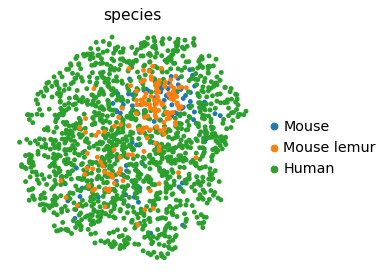

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: endothelial: capillary aerocyte cell -------
number of cells: 5124


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2936


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


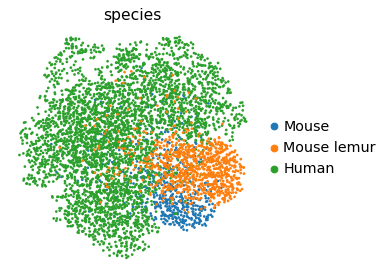

extracting highly variable genes



------- group: endothelial: capillary cell -------
number of cells: 8833


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3002


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


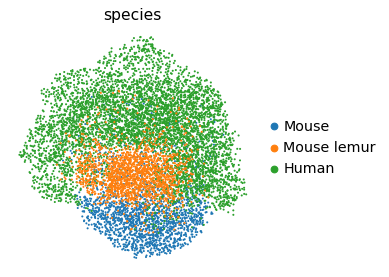

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: endothelial: lymphatic cell -------
number of cells: 720
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


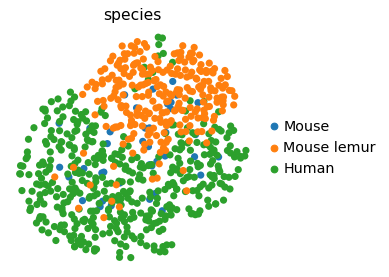

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: endothelial: vein cell -------
number of cells: 1408

 Number of highly variable genes: 3011


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


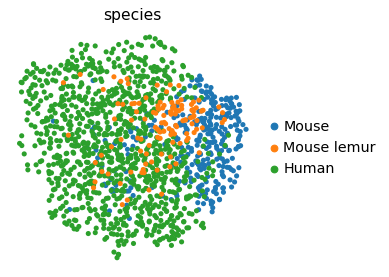

extracting highly variable genes



------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3018


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


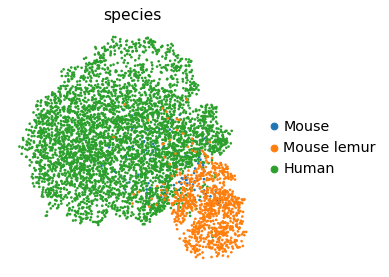

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: epithelial: ciliated cell -------
number of cells: 1370


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3230


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


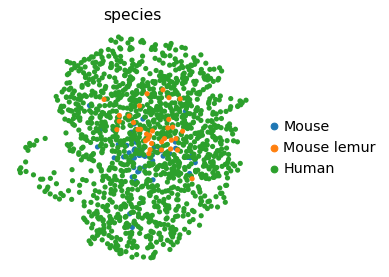

extracting highly variable genes



------- group: lymphoid: B cell -------
number of cells: 1925


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2880


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


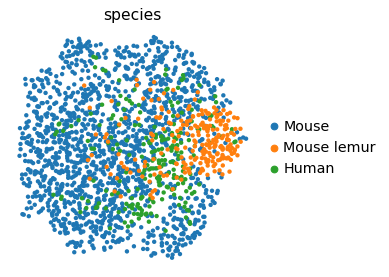

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



------- group: lymphoid: CD4+ T cell -------
number of cells: 4089

 Number of highly variable genes: 2768


    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


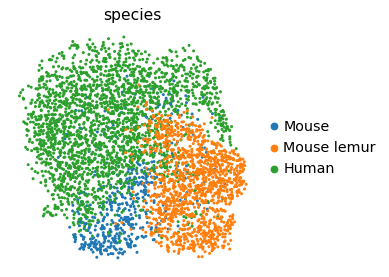

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: CD8+ T cell -------
number of cells: 3184

 Number of highly variable genes: 2830


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


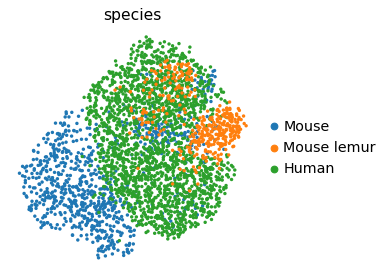

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: natural killer T cell -------
number of cells: 1220
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


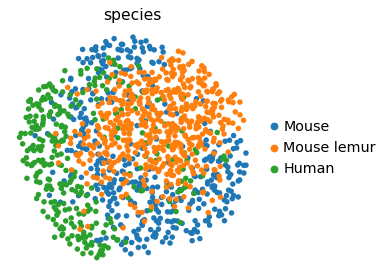

extracting highly variable genes



------- group: lymphoid: natural killer cell -------
number of cells: 7994


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2795


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


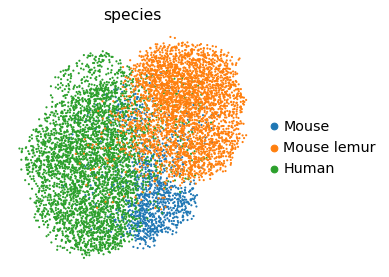

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors



------- group: lymphoid: plasma cell -------
number of cells: 305
Scanpy had an error when computing highly variable genes, using previous ones


	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


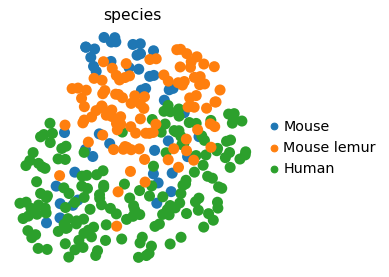

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: proliferating natural killer cell_T cell -------
number of cells: 817
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


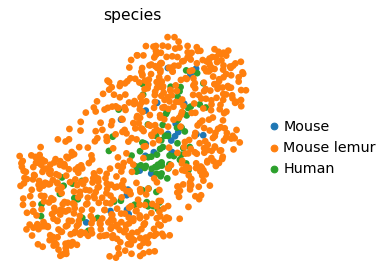

extracting highly variable genes



------- group: myeloid: alveolar macrophage -------
number of cells: 18704


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2710


    finished (0:00:09)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


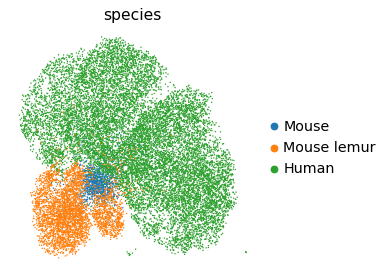

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: myeloid: conventional dendritic cell -------
number of cells: 722

 Number of highly variable genes: 2901


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


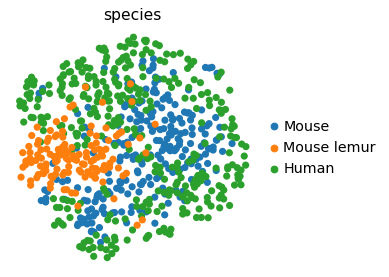

extracting highly variable genes



------- group: myeloid: monocyte -------
number of cells: 12457


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2677


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


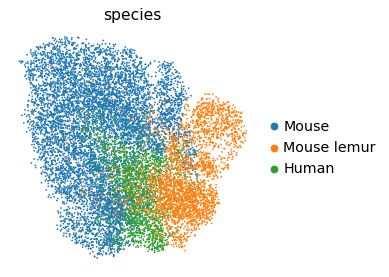

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: myeloid: plasmacytoid dendritic cell -------
number of cells: 245
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


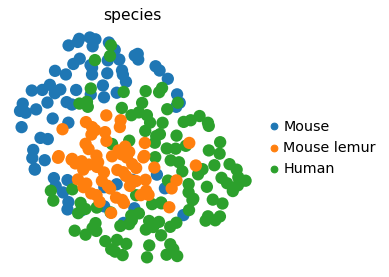

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: myeloid: proliferating alveolar macrophage -------
number of cells: 1225


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2826


    finished (0:00:04)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


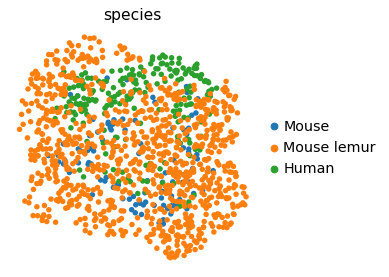

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: adventitial fibroblast -------
number of cells: 1361

 Number of highly variable genes: 3143


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


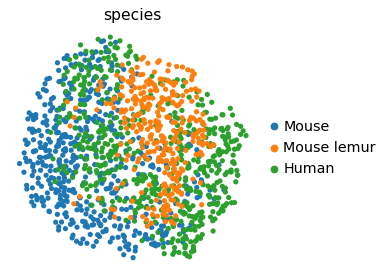

extracting highly variable genes



------- group: stromal: alveolar fibroblast -------
number of cells: 3544


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3074


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


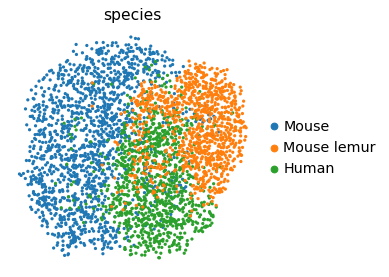

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: pericyte cell -------
number of cells: 1480

 Number of highly variable genes: 2978


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


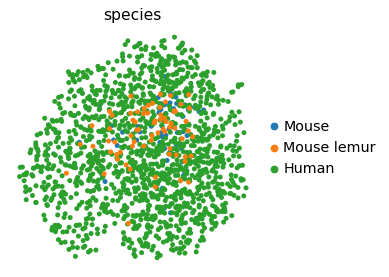


------- group: endothelial: artery cell -------
number of cells: 1544

------- group: endothelial: capillary aerocyte cell -------
number of cells: 5124

------- group: endothelial: capillary cell -------
number of cells: 8833

------- group: endothelial: lymphatic cell -------
number of cells: 720

------- group: endothelial: vein cell -------
number of cells: 1408

------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255

------- group: epithelial: ciliated cell -------
number of cells: 1370

------- group: lymphoid: B cell -------
number of cells: 1925

------- group: lymphoid: CD4+ T cell -------
number of cells: 4089

------- group: lymphoid: CD8+ T cell -------
number of cells: 3184

------- group: lymphoid: natural killer T cell -------
number of cells: 1220

------- group: lymphoid: natural killer cell -------
number of cells: 7994

------- group: lymphoid: plasma cell -------
number of cells: 305

------- group: lymphoid: proliferating natural 

In [8]:
cross_species.make_mini_adatas(groupby='compartment_narrow')
cross_species.make_subset_adatas(do_pca_umap=False)

## Do differential expression

ranking genes



------- group: endothelial: artery cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


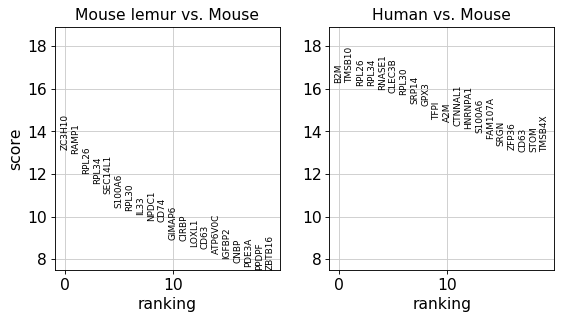

ranking genes



------- group: endothelial: capillary aerocyte cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


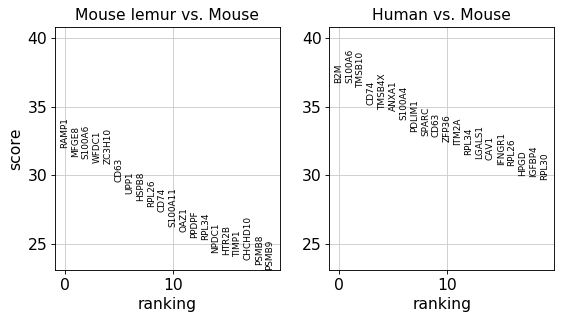

ranking genes



------- group: endothelial: capillary cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:17)


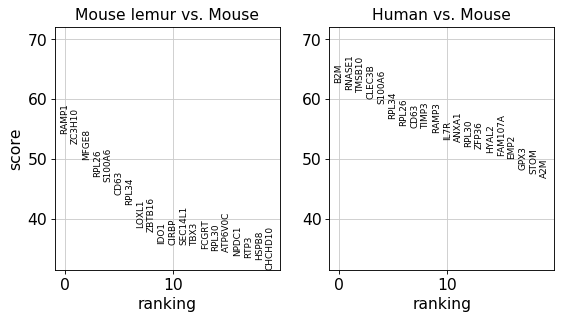

ranking genes



------- group: endothelial: lymphatic cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


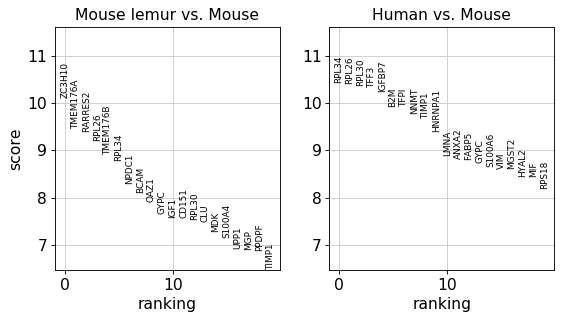

ranking genes



------- group: endothelial: vein cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


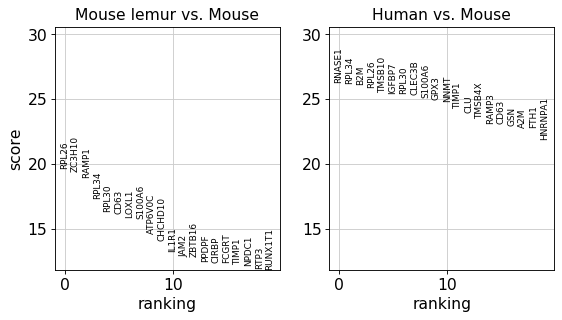

ranking genes



------- group: epithelial: alveolar epithelial cell type 2 -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWa

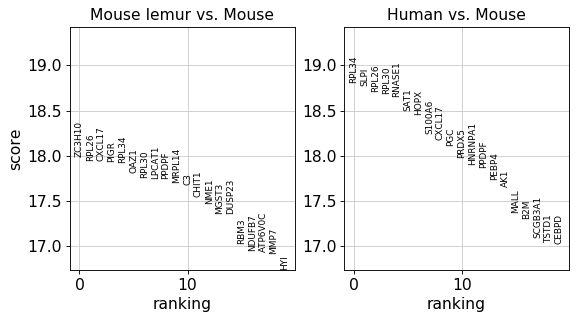

ranking genes



------- group: epithelial: ciliated cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


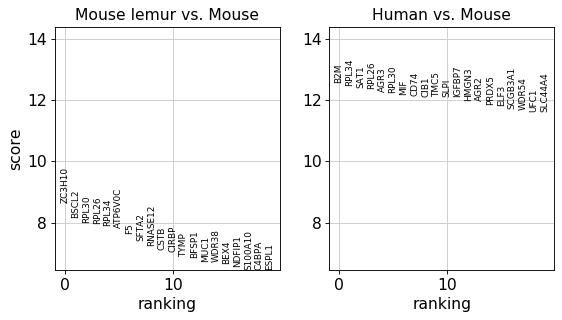

ranking genes



------- group: lymphoid: B cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


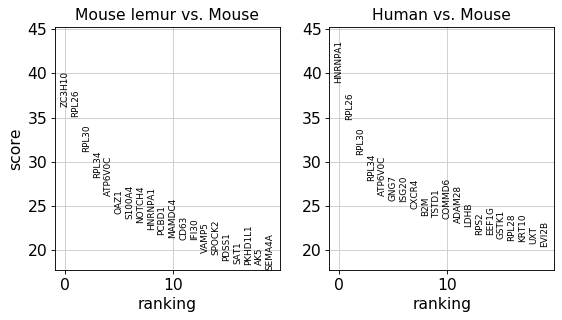

ranking genes



------- group: lymphoid: CD4+ T cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


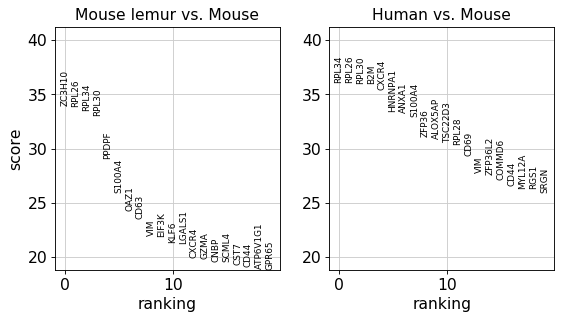

ranking genes



------- group: lymphoid: CD8+ T cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


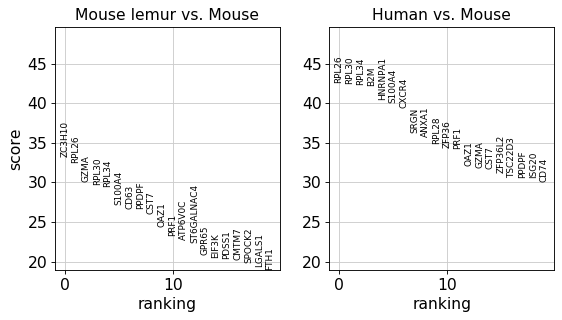

ranking genes



------- group: lymphoid: natural killer T cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


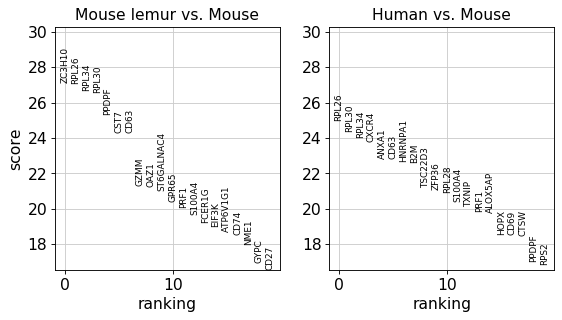

ranking genes



------- group: lymphoid: natural killer cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


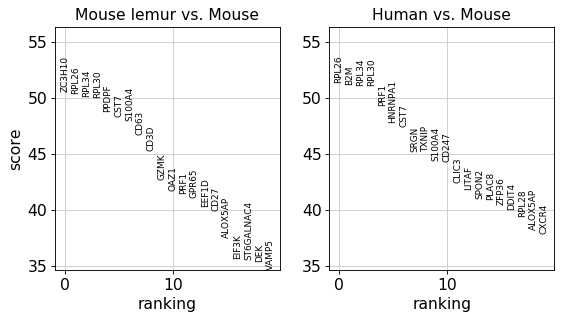

ranking genes



------- group: lymphoid: plasma cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


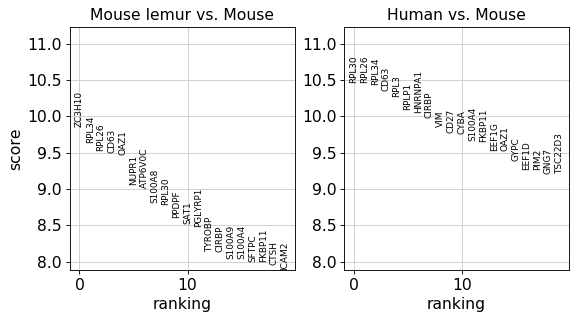

ranking genes



------- group: lymphoid: proliferating natural killer cell_T cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


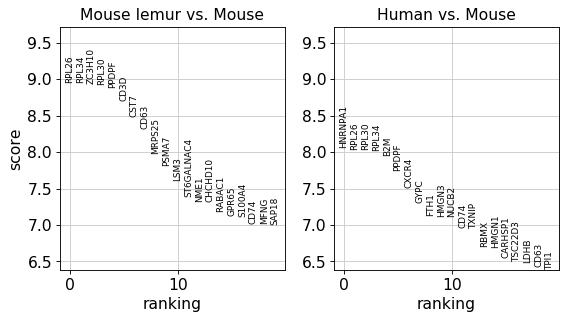

ranking genes



------- group: myeloid: alveolar macrophage -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:36)


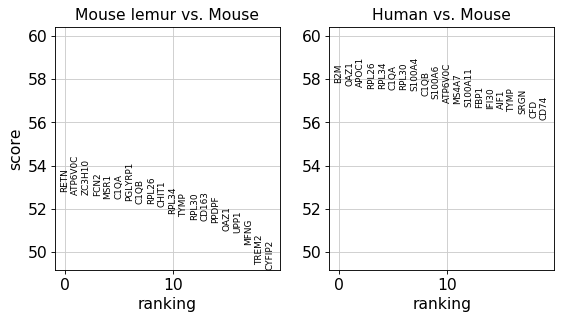

ranking genes



------- group: myeloid: conventional dendritic cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


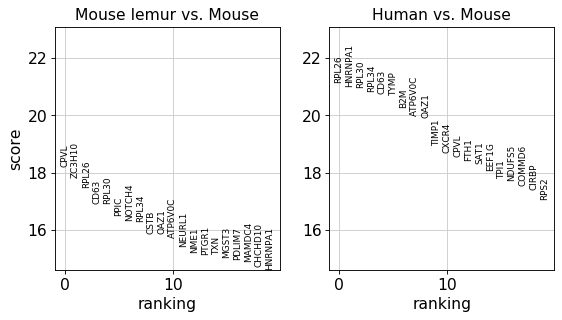

ranking genes



------- group: myeloid: monocyte -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)


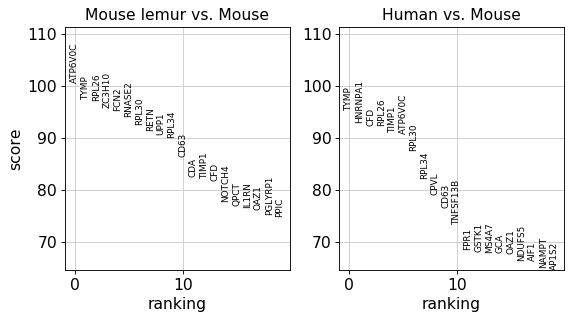

ranking genes



------- group: myeloid: plasmacytoid dendritic cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


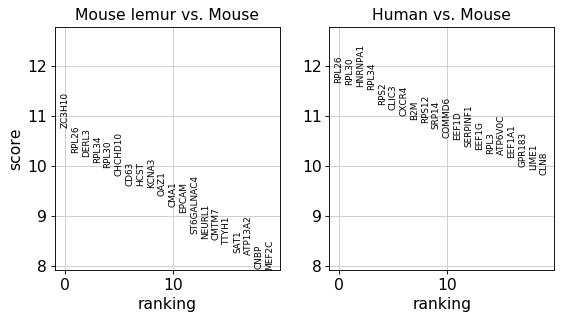

ranking genes



------- group: myeloid: proliferating alveolar macrophage -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


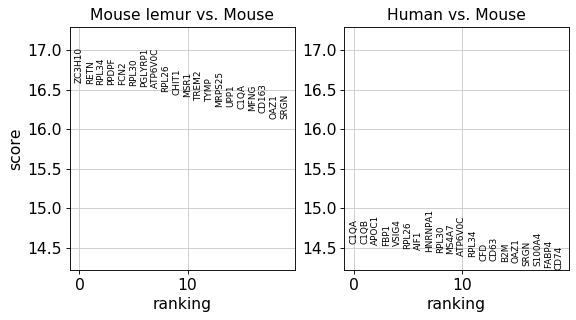

ranking genes



------- group: stromal: adventitial fibroblast -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


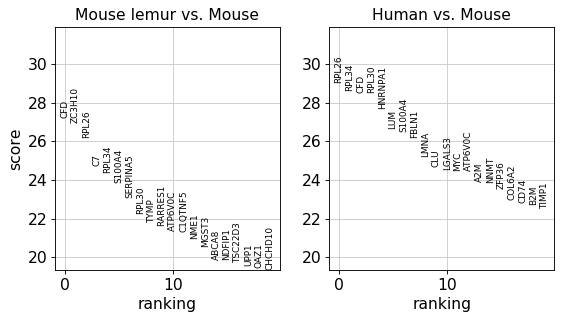

ranking genes



------- group: stromal: alveolar fibroblast -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


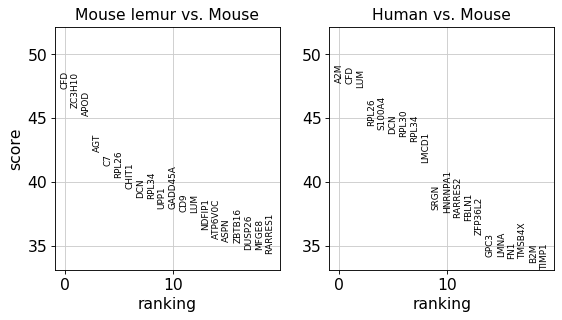

ranking genes



------- group: stromal: pericyte cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


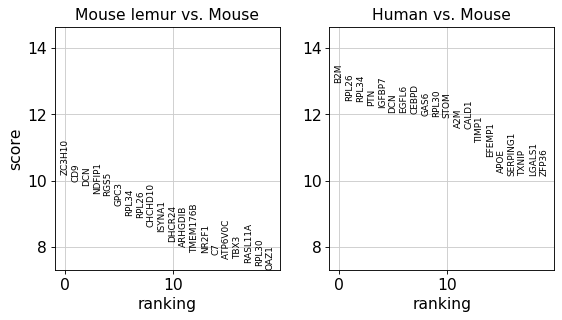

In [9]:
cross_species.do_differential_expression(method='wilcoxon', tie_correct=True, pts=True)

## Get Dissociation genes to ignore

In [10]:
dissociation_genes = set(
    pd.read_csv(
        "/home/olga/data_lg/data_sm_copy/immune-evolution/databases/nuisance-genes/dissociation_genes_3Nov2020.csv",
        index_col=0,
        squeeze=True,
    )
)
len(dissociation_genes)

1880

## Make differential expression results info tables

In [11]:
group_diffexpr_info = {
    group: diffexpr_info 
    for group, diffexpr_info in cross_species.get_per_group_diffexpr_tables(
        dissociation_genes=dissociation_genes
    )
}


------- group: endothelial: artery cell -------

------- group: endothelial: capillary aerocyte cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: endothelial: capillary cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: endothelial: lymphatic cell -------

------- group: endothelial: vein cell -------

------- group: epithelial: alveolar epithelial cell type 2 -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: epithelial: ciliated cell -------

------- group: lymphoid: B cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: CD4+ T cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: CD8+ T cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: natural killer T cell -------

------- group: lymphoid: natural killer cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: plasma cell -------

------- group: lymphoid: proliferating natural killer cell_T cell -------

------- group: myeloid: alveolar macrophage -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: myeloid: conventional dendritic cell -------

------- group: myeloid: monocyte -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: myeloid: plasmacytoid dendritic cell -------

------- group: myeloid: proliferating alveolar macrophage -------

------- group: stromal: adventitial fibroblast -------

------- group: stromal: alveolar fibroblast -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: stromal: pericyte cell -------


### Write full results to google drive

In [12]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_full_results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info.to_excel(writer, sheet_name=sheet_name)

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Write filtered results to google drive

In [13]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_filtered__pval<0.05__same_logfoldchange_direction__results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info_filtered = cross_species.filter_diffexpr_info(diffexpr_info)
        diffexpr_info_filtered.to_excel(writer, sheet_name=sheet_name)

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


## Concatenate differential expression info

In [14]:
dfs = []

for group, diffexpr_info in group_diffexpr_info.items():
    df = diffexpr_info.copy()
    df['group'] = group
    dfs.append(df)
diffexpr_aggregated = pd.concat(dfs)
diffexpr_aggregated.index.name = 'gene_name'
diffexpr_aggregated.head()

logfoldchange                  pval_adj              \
species           Human Mouse lemur         Human Mouse lemur   
gene_name                                                       
A1BG          26.216629    0.000000  2.788565e-01    1.000000   
A1CF           0.000000    0.000000  1.000000e+00    1.000000   
A2M           46.026428    0.000000  2.444300e-45    1.000000   
A3GALT2        0.000000    0.000000  1.000000e+00    1.000000   
A4GALT         2.866803  -28.459358  9.178028e-05    0.000551   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
A1BG                0.554619    0.000000   1.542726    0.000000   
A1CF                0.000000    0.000000   0.000000    0.000000   
A2M                44.611845    0.000000  14.448993    0.000000   
A3GALT2             0.000000    0.000000   0.000000    0.000000   
A4GALT              4.037251    3.259009   4.341513   -3.954403   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse lemur     Human                        
gene_name                                                                 
A1BG                0.000000         0.0  0.024502                False   
A1CF                0.000000         0.0  0.000000                False   
A2M                 0.000000         0.0  0.884380                False   
A3GALT2             0.000000         0.0  0.000000                False   
A4GALT              0.105263         0.0  0.314701                False   

                              group  
species                              
gene_name                            
A1BG       endothelial: artery cell  
A1CF       endothelial: artery cell  
A2M        endothelial: artery cell  
A3GALT2    endothelial: artery cell  
A4GALT     endothelial: artery cell

### Filter on percent of cells expressing

In [15]:
%%time


def filter_percent_expressing(
    df,
    higher_expression_threshold=0.6,
    lower_expression_threshold=0.1,
    lfc="logfoldchange",
    human="Human",
    mouse="Mouse",
    lemur="Mouse lemur",
    pct_exp="percent_expressing",
):
    assert len(df.index) == 1
    # "should" always be one row at a time
    row = df.iloc[0]
    if (row[pct_exp] >= lower_expression_threshold).all():

        human_pct = row[(pct_exp, human)]
        mouse_pct = row[(pct_exp, mouse)]
        lemur_pct = row[(pct_exp, lemur)]

        if (
            row[(lfc, human)] > 0
            and human_pct >= higher_expression_threshold
        ):
            # Positive logfoldchange in human --> must be above threshold in human
            return True
        elif (
            row[(lfc, lemur)] > 0
            and lemur_pct >= higher_expression_threshold
        ):
            # Positive logfoldchange in lemur --> must be above threshold in lemur
            return True
        elif (
            row[(lfc, human)] < 0
            and row[(pct_exp, mouse)] >= higher_expression_threshold
        ):
            # Neglogfold change in human --> must be above threshold in mouse
            return True
        elif (
            row[(lfc, lemur)] < 0
            and row[(pct_exp, mouse)] >= higher_expression_threshold
        ):
            # Neglogfold change in lemur --> must be above threshold in mouse
            return True
        else:
            return False
    else:
        False


diffexpr_aggregated_pct_expr_filtered = diffexpr_aggregated.groupby(
    ["gene_name", "group"], axis=0
).filter(filter_percent_expressing)
print(diffexpr_aggregated_pct_expr_filtered.shape)
diffexpr_aggregated_pct_expr_filtered.head()

(15002, 13)
CPU times: user 2min 56s, sys: 1.6 s, total: 2min 57s
Wall time: 2min 56s


logfoldchange                  pval_adj                \
species           Human Mouse lemur         Human   Mouse lemur   
gene_name                                                         
ABLIM1        -3.260081   -0.845535  1.056030e-09  4.194207e-05   
ACTB          22.186081  -17.005981  6.959455e-10  4.255124e-01   
ACTG1        -44.022243  -57.945129  1.619928e-26  2.164756e-29   
ACVRL1       -15.604076  -17.814291  2.333680e-23  4.079698e-20   
ADAM15        -0.459347   -2.790447  6.057302e-01  4.324173e-10   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
ABLIM1              8.976324    4.377350  -6.496776   -4.608402   
ACTB                9.157425    0.371088   6.563450   -1.214049   
ACTG1              25.790504   28.664591 -11.003302  -11.781891   
ACVRL1             22.631959   19.389372 -10.310266   -9.696717   
ADAM15              0.217721    9.364097  -0.952025   -6.766789   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse lemur     Human                        
gene_name                                                                 
ABLIM1              0.610526    0.202797  0.326187                False   
ACTB                0.978947    0.986014  0.993874                 True   
ACTG1               1.000000    0.804196  0.957121                 True   
ACVRL1              0.947368    0.272727  0.712098                False   
ADAM15              0.663158    0.139860  0.575804                False   

                              group  
species                              
gene_name                            
ABLIM1     endothelial: artery cell  
ACTB       endothelial: artery cell  
ACTG1      endothelial: artery cell  
ACVRL1     endothelial: artery cell  
ADAM15     endothelial: artery cell

In [16]:
diffexpr_aggregated.shape

(285384, 13)

In [17]:
unfiltered = (
    diffexpr_aggregated.logfoldchange.replace(0, np.nan)
    .dropna(how="all")
    .values.flatten()
)
unfiltered = unfiltered[np.isfinite(unfiltered)]

after_filtering = (
    diffexpr_aggregated_pct_expr_filtered.logfoldchange.replace(0, np.nan)
    .dropna(how="all")
    .values.flatten()
)
after_filtering = after_filtering[np.isfinite(after_filtering)]

[None]

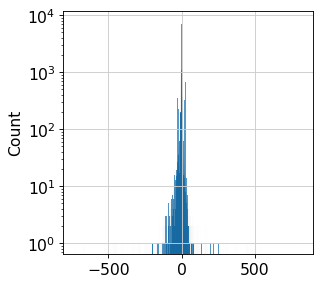

In [18]:
fig, ax = plt.subplots()
sns.histplot(unfiltered, label="unfiltered")
sns.histplot(after_filtering, label="after filtering for % cells expressing")
ax.set(yscale='log')

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

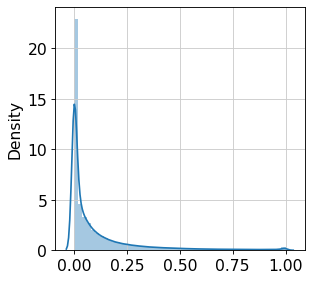

In [19]:
sns.distplot(diffexpr_aggregated['percent_expressing'])

## Volcano plot (pval vs logfoldchange)

### Reformat to tidy dataframe

In [20]:
diffexpr_aggregated_tidy = diffexpr_aggregated_pct_expr_filtered.stack().reset_index()
diffexpr_aggregated_tidy['species'] = diffexpr_aggregated_tidy['species'].replace('', np.nan)
diffexpr_aggregated_tidy.is_dissociation_gene = diffexpr_aggregated_tidy.is_dissociation_gene.fillna(method='backfill')
diffexpr_aggregated_tidy.group = diffexpr_aggregated_tidy.group.fillna(method='backfill')
diffexpr_aggregated_tidy = diffexpr_aggregated_tidy.query('is_dissociation_gene == False')
diffexpr_aggregated_tidy = diffexpr_aggregated_tidy.rename(columns={'level_0': "gene_name"})

# diffexpr_aggregated_tidy = diffexpr_aggregated_tidy.dropna()
diffexpr_aggregated_tidy.head()

,gene_name,species,group,is_dissociation_gene,logfoldchange,percent_expressing,pval_adj,pval_adj_neg_log10,score
0,ABLIM1,NaN,endothelial: artery cell,False,NaN,NaN,NaN,NaN,NaN
9,ACTG1,Human,endothelial: artery cell,False,-44.022243,0.957121,1.619928e-26,25.790504,-11.003302
10,ACTG1,Mouse,endothelial: artery cell,False,NaN,1.000000,NaN,NaN,NaN
11,ACTG1,Mouse lemur,endothelial: artery cell,False,-57.945129,0.804196,2.164756e-29,28.664591,-11.781891
12,ACVRL1,NaN,endothelial: artery cell,False,NaN,NaN,NaN,NaN,NaN


## Plot distributions

### Wilcoxon statistical score

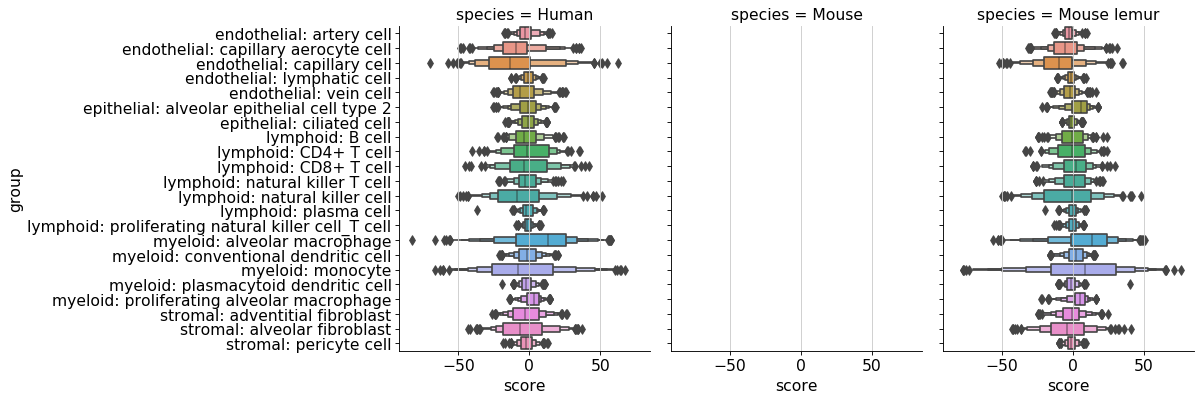

In [21]:
sns.catplot(y='group', x='score', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

### Logfoldchange

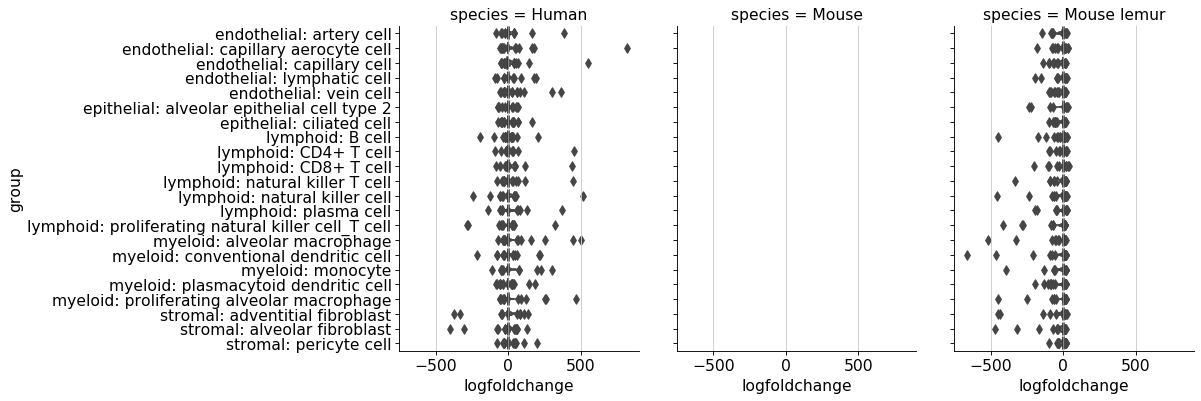

In [22]:
sns.catplot(y='group', x='logfoldchange', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

### Percent expressing

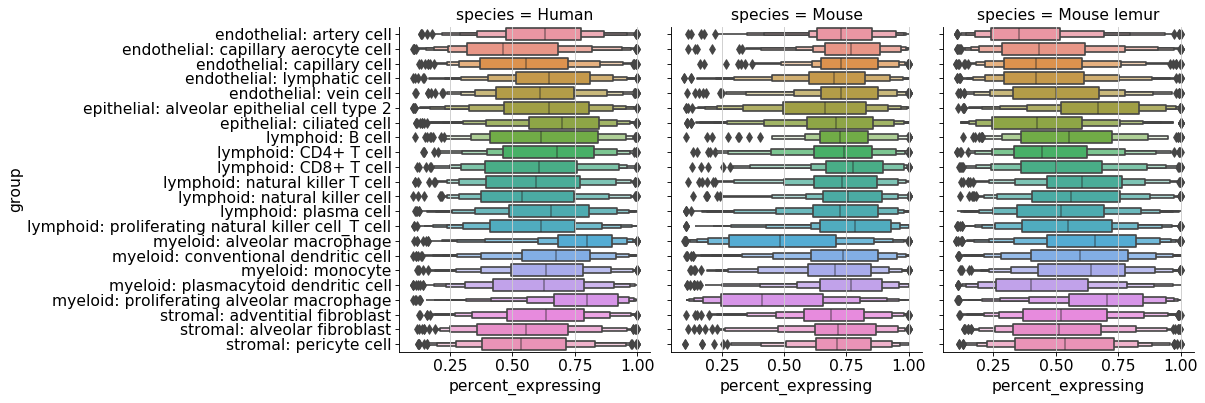

In [23]:
sns.catplot(y='group', x='percent_expressing', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

### -log(pvalue_adj)

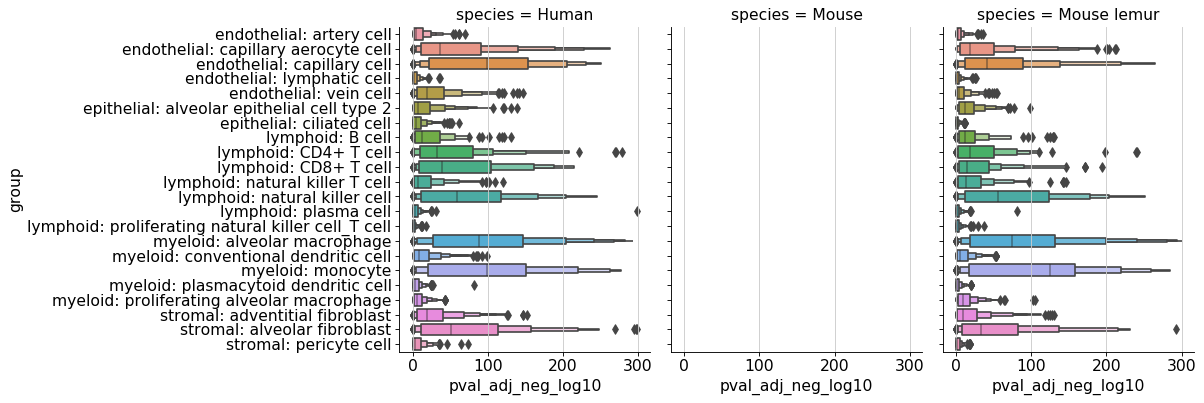

In [24]:
sns.catplot(y='group', x='pval_adj_neg_log10', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

In [25]:
# diffexpr_aggregated_tidy.groupby(['group', 'gene_name']).apply(lambda x: )

In [26]:
diffexpr_aggregated_tidy

,gene_name,species,group,is_dissociation_gene,logfoldchange,percent_expressing,pval_adj,pval_adj_neg_log10,score
0,ABLIM1,NaN,endothelial: artery cell,False,NaN,NaN,NaN,NaN,NaN
9,ACTG1,Human,endothelial: artery cell,False,-44.022243,0.957121,1.619928e-26,25.790504,-11.003302
10,ACTG1,Mouse,endothelial: artery cell,False,NaN,1.000000,NaN,NaN,NaN
11,ACTG1,Mouse lemur,endothelial: artery cell,False,-57.945129,0.804196,2.164756e-29,28.664591,-11.781891
12,ACVRL1,NaN,endothelial: artery cell,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
59996,YWHAQ,NaN,stromal: pericyte cell,False,NaN,NaN,NaN,NaN,NaN
59997,YWHAQ,Human,stromal: pericyte cell,False,-4.755893,0.518519,3.770333e-06,5.423620,-5.083778
59998,YWHAQ,Mouse,stromal: pericyte cell,False,NaN,0.881356,NaN,NaN,NaN
59999,YWHAQ,Mouse lemur,stromal: pericyte cell,False,-2.486547,0.549296,3.623429e-01,0.440880,-1.694792


## Set score, logfoldchange, p value thresholds

In [27]:
SCORE_THRESHOLD = 2
LOGFOLDCHANGE_THRESHOLD = 2
NEG_LOG10_PVALUE_THRESHOLD = 10

In [28]:
# tab10 = sns.color_palette('tab10')
# mouse_color, lemur_color, human_color = tab10[:3]

# def scatterplot_significance(
#     x,
#     y,
#     z,
#     *args,
#     logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
#     neg_log10_pvalue_threshold=NEG_LOG10_PVALUE_THRESHOLD,
#     score_threshold=SCORE_THRESHOLD,
#     **kwargs
# ):
#     logfoldchange_mask = x.abs() > logfoldchange_threshold
#     pvalue_mask = y > neg_log10_pvalue_threshold
#     score_mask = z.abs() > score_threshold
#     significance_mask = logfoldchange_mask & pvalue_mask & score_mask

#     # Plot insignificant in grey with low alpha (transparent)
#     sns.scatterplot(
#         x=x[~significance_mask], y=y[~significance_mask], color="grey", alpha=0.1
#     )

#     # Plot significant genes in color with no alpha
#     sns.scatterplot(x=x[significance_mask], y=y[significance_mask], *args, **kwargs)


# g = sns.FacetGrid(
#     diffexpr_aggregated_tidy,
#     col="species",
#     hue="species",
#     row="group",
#     aspect=1.4,
#     height=2.5,
#     palette=[human_color, lemur_color],
# )
# g.map(scatterplot_significance, "logfoldchange", "pval_adj_neg_log10", 'score', rasterized=True)
# g.set_titles("{row_name}")
# for ax in g.axes.flat:
#     title = ax.get_title()
#     title = title.split(":")[-1].strip()
#     ax.set_title(title)
# g.add_legend()
# g.tight_layout()

# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__volcanoplot.pdf"), dpi=300
# )

## Plot significant logfoldchange

In [29]:
diffexpr_aggregated.head()

logfoldchange                  pval_adj              \
species           Human Mouse lemur         Human Mouse lemur   
gene_name                                                       
A1BG          26.216629    0.000000  2.788565e-01    1.000000   
A1CF           0.000000    0.000000  1.000000e+00    1.000000   
A2M           46.026428    0.000000  2.444300e-45    1.000000   
A3GALT2        0.000000    0.000000  1.000000e+00    1.000000   
A4GALT         2.866803  -28.459358  9.178028e-05    0.000551   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
A1BG                0.554619    0.000000   1.542726    0.000000   
A1CF                0.000000    0.000000   0.000000    0.000000   
A2M                44.611845    0.000000  14.448993    0.000000   
A3GALT2             0.000000    0.000000   0.000000    0.000000   
A4GALT              4.037251    3.259009   4.341513   -3.954403   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse lemur     Human                        
gene_name                                                                 
A1BG                0.000000         0.0  0.024502                False   
A1CF                0.000000         0.0  0.000000                False   
A2M                 0.000000         0.0  0.884380                False   
A3GALT2             0.000000         0.0  0.000000                False   
A4GALT              0.105263         0.0  0.314701                False   

                              group  
species                              
gene_name                            
A1BG       endothelial: artery cell  
A1CF       endothelial: artery cell  
A2M        endothelial: artery cell  
A3GALT2    endothelial: artery cell  
A4GALT     endothelial: artery cell

In [30]:
pvalue_mask = (
    diffexpr_aggregated["pval_adj_neg_log10"] > NEG_LOG10_PVALUE_THRESHOLD
).any(axis=1)
logfoldchange_mask = (
    diffexpr_aggregated["logfoldchange"].abs() > LOGFOLDCHANGE_THRESHOLD
).any(axis=1)
score_mask = (diffexpr_aggregated["score"].abs() > SCORE_THRESHOLD).any(axis=1)

diffexpr_aggregated_significant = diffexpr_aggregated.loc[
    pvalue_mask
    & logfoldchange_mask
    & score_mask
    & ~diffexpr_aggregated.is_dissociation_gene.values
]
diffexpr_aggregated_significant

logfoldchange                  pval_adj                \
species           Human Mouse lemur         Human   Mouse lemur   
gene_name                                                         
A2M           46.026428    0.000000  2.444300e-45  1.000000e+00   
AAK1           5.753748    5.196244  6.435282e-11  9.042245e-02   
AARD         -27.649094   -0.967990  2.179969e-15  8.908538e-02   
ABI3BP        -4.686798  -36.755257  6.022260e-08  2.297080e-23   
ACBD6         -2.704306   -1.118279  8.313828e-15  1.813411e-07   
...                 ...         ...           ...           ...   
ZNF496        -3.769083   -1.739183  3.706214e-15  1.500985e-01   
ZNF740        -3.232608   -2.135899  2.831867e-12  3.937252e-02   
ZNF787        -3.457018   -1.062488  9.831514e-12  3.327147e-01   
ZNRF1         -5.163499  -31.119999  5.228890e-36  2.005642e-04   
ZNRF3         -3.559085   -0.036928  8.809783e-19  3.905376e-01   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
A2M                44.611845    0.000000  14.448993    0.000000   
AAK1               10.191432    1.043724   6.922734    2.170717   
AARD               14.661550    1.050194  -8.302621   -2.176978   
ABI3BP              7.220241   22.638824  -5.823138  -10.468597   
ACBD6              14.080199    6.741504  -8.137042   -5.739316   
...                      ...         ...        ...         ...   
ZNF496             14.431069    0.823624  -8.252261   -2.267087   
ZNF740             11.547927    1.404807  -7.393116   -2.878956   
ZNF787             11.007380    0.477928  -7.221183   -1.747136   
ZNRF1              35.281591    3.697747 -12.852721   -4.488621   
ZNRF3              18.055035    0.408337  -9.219870   -1.642316   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse lemur     Human                        
gene_name                                                                 
A2M                 0.000000    0.000000  0.884380                False   
AAK1                0.042105    0.118881  0.402757                False   
AARD                0.052632    0.006993  0.000000                False   
ABI3BP              0.600000    0.000000  0.358346                False   
ACBD6               0.389474    0.062937  0.104900                False   
...                      ...         ...       ...                  ...   
ZNF496              0.135593    0.028169  0.008148                False   
ZNF740              0.186441    0.028169  0.021481                False   
ZNF787              0.152542    0.056338  0.014815                False   
ZNRF1               0.254237    0.000000  0.010370                False   
ZNRF3               0.220339    0.098592  0.018519                False   

                              group  
species                              
gene_name                            
A2M        endothelial: artery cell  
AAK1       endothelial: artery cell  
AARD       endothelial: artery cell  
ABI3BP     endothelial: artery cell  
ACBD6      endothelial: artery cell  
...                             ...  
ZNF496       stromal: pericyte cell  
ZNF740       stromal: pericyte cell  
ZNF787       stromal: pericyte cell  
ZNRF1        stromal: pericyte cell  
ZNRF3        stromal: pericyte cell  

[35359 rows x 13 columns]

In [31]:
diffexpr_aggregated_significant.group.nunique()

22

In [32]:
n_groups_per_gene = diffexpr_aggregated_significant.groupby('gene_name').group.nunique()
n_groups_per_gene.head()

gene_name
A1BG        9
A2M        11
A3GALT2     1
A4GALT      5
AACS        6
Name: group, dtype: int64

In [33]:
significant_genes = diffexpr_aggregated_significant.index.unique()
print(len(significant_genes))
significant_genes[:10]

8212


Index(['A2M', 'AAK1', 'AARD', 'ABI3BP', 'ACBD6', 'ACE', 'ACER2', 'ACSF2',
       'ACTN4', 'ACVRL1'],
      dtype='object', name='gene_name')

In [34]:
# test_gene = adata[:, ["ATP6V0C", 'HNRNPA1', "SFTPB", "SFTPC"] ].to_df()
test_gene = adata[:, significant_genes ].to_df()

test_gene = test_gene.join(adata.obs[['species', 'compartment_narrow']])
means = test_gene.groupby(['species', 'compartment_narrow']).mean()#.unstack(level=0)
means.head()

A2M      AAK1      AARD  \
species compartment_narrow                                              
Mouse   endothelial: artery cell              0.0  0.094726  0.191015   
        endothelial: capillary aerocyte cell  0.0  0.336811  5.117906   
        endothelial: capillary cell           0.0  0.506567  1.002849   
        endothelial: lymphatic cell           0.0  0.312838  0.076894   
        endothelial: vein cell                0.0  0.391572  1.249706   

                                                ABI3BP     ACBD6        ACE  \
species compartment_narrow                                                    
Mouse   endothelial: artery cell              4.762121  1.255120  21.906607   
        endothelial: capillary aerocyte cell  2.006546  1.314641  11.700187   
        endothelial: capillary cell           1.291106  1.152630  15.739064   
        endothelial: lymphatic cell           4.035179  1.119091   1.288079   
        endothelial: vein cell                0.723929  1.200953   9.336237   

                                                 ACER2     ACSF2     ACTN4  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              5.593863  0.345359  4.132685   
        endothelial: capillary aerocyte cell  0.568714  0.098700  1.907267   
        endothelial: capillary cell           5.753216  0.364791  3.274419   
        endothelial: lymphatic cell           0.323582  0.737305  2.781417   
        endothelial: vein cell                4.671333  0.158567  3.796308   

                                                 ACVRL1      ACY3  ADAMTSL5  \
species compartment_narrow                                                    
Mouse   endothelial: artery cell              15.944774  0.108557  0.131566   
        endothelial: capillary aerocyte cell  31.490969  0.033255  1.557368   
        endothelial: capillary cell           24.192417  0.125436  0.171002   
        endothelial: lymphatic cell            2.812158  0.199020  0.000000   
        endothelial: vein cell                17.057760  0.093346  0.113395   

                                                 ADCY4      ADH7   ADIPOR1  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              3.061527  0.515663  2.641449   
        endothelial: capillary aerocyte cell  1.897312  0.000000  2.690303   
        endothelial: capillary cell           2.908901  0.004653  2.309667   
        endothelial: lymphatic cell           0.575918  0.000000  2.460015   
        endothelial: vein cell                3.488899  0.000000  2.668809   

                                               ADIPOR2       ADK   AFAP1L1  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              1.261548  1.594356  2.730857   
        endothelial: capillary aerocyte cell  0.403045  1.603206  8.883574   
        endothelial: capillary cell           1.064003  2.026027  7.563470   
        endothelial: lymphatic cell           0.514620  0.587491  1.439904   
        endothelial: vein cell                0.941785  3.442316  3.701393   

                                                AGPAT4    AKR1E2     ALAS1  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              1.453302  0.227834  2.610309   
        endothelial: capillary aerocyte cell  3.977730  0.349062  1.210984   
        endothelial: capillary cell           2.867996  0.201410  2.109930   
        endothelial: lymphatic cell           0.404346  0.522849  0.367256   
        endothelial: vein cell                2.021411  0.353033  1.055118   

                                                 AMACR    AMOTL1    AMOTL2  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              0.127790  1.526634  1.529250   
    

### Get "average intensity" across (human, mouse) and (lemur, mouse) pairs, i.e. means of means

In [35]:
def primate_averages(df):
    #     df.columns = df.columns.droplevel(level=0)
    series = df.iloc[:, 0]

    mouse = series.loc["Mouse"]
    human = series.loc["Human"]
    lemur = series.loc["Mouse lemur"]
    return pd.DataFrame(
        {"Human": 0.5 * (human + mouse), "Mouse lemur": 0.5 * (lemur + mouse)}
    )


average_intensities = means.groupby(level=0, axis=1).apply(primate_averages)
average_intensities.head()

A1BG                   A2M  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.037545    0.000000  5.589919   
endothelial: capillary aerocyte cell  0.070724    0.000000  2.439599   
endothelial: capillary cell           0.042971    0.001296  4.733128   
endothelial: lymphatic cell           0.058124    0.000000  1.835795   
endothelial: vein cell                0.012932    0.000000  5.361577   

                                                   A3GALT2              \
                                     Mouse lemur     Human Mouse lemur   
compartment_narrow                                                       
endothelial: artery cell                0.000000  0.000000    0.000000   
endothelial: capillary aerocyte cell    0.000000  0.001724    0.008214   
endothelial: capillary cell             0.002050  0.004240    0.005603   
endothelial: lymphatic cell             0.011114  0.000000    0.022483   
endothelial: vein cell                  0.000000  0.002764    0.002764   

                                        A4GALT                  AACS  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.810186    0.157069  0.073836   
endothelial: capillary aerocyte cell  1.332793    0.882555  0.063879   
endothelial: capillary cell           0.887428    0.364755  0.051905   
endothelial: lymphatic cell           1.402110    0.293161  0.071946   
endothelial: vein cell                1.269632    0.468199  0.107405   

                                                     AADAC              \
                                     Mouse lemur     Human Mouse lemur   
compartment_narrow                                                       
endothelial: artery cell                0.068057  0.001361         0.0   
endothelial: capillary aerocyte cell    0.040547  0.000982         0.0   
endothelial: capillary cell             0.045300  0.000000         0.0   
endothelial: lymphatic cell             0.060474  0.018763         0.0   
endothelial: vein cell                  0.093581  0.002431         0.0   

                                          AAK1                  AAMP  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.972462    0.815014  1.412651   
endothelial: capillary aerocyte cell  0.608145    0.700775  1.887131   
endothelial: capillary cell           1.046556    0.911511  1.573170   
endothelial: lymphatic cell           0.569231    0.686286  1.417085   
endothelial: vein cell                1.058323    0.739745  1.358149   

                                                      AARD              \
                                     Mouse lemur     Human Mouse lemur   
compartment_narrow                                                       
endothelial: artery cell                1.905219  0.095508    0.146605   
endothelial: capillary aerocyte cell    2.194249  2.558953    2.558953   
endothelial: capillary cell             1.625385  0.502542    0.501424   
endothelial: lymphatic cell             1.471896  0.040024    0.038447   
endothelial: vein cell                  1.529579  0.630329    0.624853   

                                         AASDH              AASDHPPT  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.101101    0.092530  0.465772   
endothelial: capillary aerocyte cell  0.138791    0.327526  0.501957   
endothelial: capillary cell           0.139669    0.320500  0.482579   
endothelial: lymphatic cell           0.185508    0.274589  0.431271   
endothelial: vein cell      

In [36]:
average_intensities_reformatted = average_intensities.stack(level=0)  # .T
average_intensities_reformatted.columns = pd.MultiIndex.from_tuples(
    [("average_intensity", "Human"), ("average_intensity", "Mouse lemur")]
)
# average_intensities_reformatted = average_intensities_reformatted.reset_index()
average_intensities_reformatted = average_intensities_reformatted.rename(columns={'compartment_narrow': 'group'})
# average_intensities_reformatted.index.name = 'gene_name'
# average_intensities_reformatted.head()
average_intensities_reformatted.head()

average_intensity            
                                             Human Mouse lemur
compartment_narrow                                            
endothelial: artery cell A1BG             0.037545    0.000000
                         A2M              5.589919    0.000000
                         A3GALT2          0.000000    0.000000
                         A4GALT           0.810186    0.157069
                         AACS             0.073836    0.068057

In [37]:
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_pct_expr_filtered.reset_index().join(
        average_intensities_reformatted, on=["group", "gene_name"]
    )
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.set_index("gene_name")
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.stack()
)
diffexpr_aggregated_significant_for_ma_plot[
    "group"
] = diffexpr_aggregated_significant_for_ma_plot["group"].fillna(method="ffill")
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.dropna(subset=["logfoldchange"])
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.drop(columns=["is_dissociation_gene"])
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.reset_index(level=1)
)
diffexpr_aggregated_significant_for_ma_plot[
    "average_intensity_abs"
] = diffexpr_aggregated_significant_for_ma_plot.average_intensity.abs()

diffexpr_aggregated_significant_for_ma_plot[
    "score_abs"
] = diffexpr_aggregated_significant_for_ma_plot.score.abs()
# diffexpr_aggregated_significant_for_ma_plot.unstack()
diffexpr_aggregated_significant_for_ma_plot.head()

,species,average_intensity,group,logfoldchange,percent_expressing,pval_adj,pval_adj_neg_log10,score,average_intensity_abs,score_abs
gene_name,,,,,,,,,,
ABLIM1,Human,2.237584,endothelial: artery cell,-3.260081,0.326187,1.056030e-09,8.976324,-6.496776,2.237584,6.496776
ABLIM1,Mouse lemur,2.942692,endothelial: artery cell,-0.845535,0.202797,4.194207e-05,4.377350,-4.608402,2.942692,4.608402
ACTB,Human,NaN,endothelial: artery cell,22.186081,0.993874,6.959455e-10,9.157425,6.563450,NaN,6.563450
ACTB,Mouse lemur,NaN,endothelial: artery cell,-17.005981,0.986014,4.255124e-01,0.371088,-1.214049,NaN,1.214049
ACTG1,Human,NaN,endothelial: artery cell,-44.022243,0.957121,1.619928e-26,25.790504,-11.003302,NaN,11.003302


In [38]:
# g = sns.FacetGrid(
#     diffexpr_aggregated_significant_for_ma_plot,
#     col="species",
#     row="group",
#     hue="species",
#     palette=[human_color, lemur_color],
#     margin_titles=True,
#     sharex=False,
#     sharey=False,
# )
# # g.set_titles('{}')
# g.map(sns.scatterplot, "average_intensity", "score_abs")

In [39]:
# g = sns.FacetGrid(
#     diffexpr_aggregated_significant_for_ma_plot,
#     col="species",
#     row="group",
#     hue="species",
#     palette=[human_color, lemur_color],
#     margin_titles=True,
#     sharex=False,
#     sharey=False,
# )
# # g.set_titles('{}')
# g.map(sns.scatterplot, "logfoldchange", "score_abs")

In [40]:
# g = sns.FacetGrid(
#     diffexpr_aggregated_significant_for_ma_plot,
#     col="species",
#     row="group",
#     hue="species",
#     palette=[human_color, lemur_color],
#     margin_titles=True,
#     sharex=False,
#     sharey=False,
# )
# # g.set_titles('{}')
# g.map(sns.scatterplot, "average_intensity", "logfoldchange")

### What's up with the genes that are on the outer edges of the MA plot

In [41]:
df = diffexpr_aggregated_significant_for_ma_plot.query('group == "endothelial: artery cell"')
df.head()

,species,average_intensity,group,logfoldchange,percent_expressing,pval_adj,pval_adj_neg_log10,score,average_intensity_abs,score_abs
gene_name,,,,,,,,,,
ABLIM1,Human,2.237584,endothelial: artery cell,-3.260081,0.326187,1.056030e-09,8.976324,-6.496776,2.237584,6.496776
ABLIM1,Mouse lemur,2.942692,endothelial: artery cell,-0.845535,0.202797,4.194207e-05,4.377350,-4.608402,2.942692,4.608402
ACTB,Human,NaN,endothelial: artery cell,22.186081,0.993874,6.959455e-10,9.157425,6.563450,NaN,6.563450
ACTB,Mouse lemur,NaN,endothelial: artery cell,-17.005981,0.986014,4.255124e-01,0.371088,-1.214049,NaN,1.214049
ACTG1,Human,NaN,endothelial: artery cell,-44.022243,0.957121,1.619928e-26,25.790504,-11.003302,NaN,11.003302


In [42]:
group_name = 'endothelial: artery cell'

In [43]:
ad = cross_species.mini_adatas[group_name]
ad

AnnData object with n_obs × n_vars = 1544 × 12972
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'narrow_group_dendrogram', 'narrow_group_dendrogram_colors', 'narrow_group_dendrogram_color', 'asdf', 'asdf_colors', 'dendrogram_group', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'dendrogram_group_name_colors', 'dendrogram_subgroup_name_colors'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapie

In [44]:
outlier_genes = df.query('logfoldchange > 40 and species == "Human" and average_intensity < 10')
outlier_genes

,species,average_intensity,group,logfoldchange,percent_expressing,pval_adj,pval_adj_neg_log10,score,average_intensity_abs,score_abs
gene_name,,,,,,,,,,


In [45]:
', '.join(outlier_genes.index)

''

In [46]:
cross_species.dotplots(outlier_genes.index, select_group='endothelial: artery cell')

### Join average intensities with differential expression results for MA plot

In [47]:
xlsx_significant = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression__significant_only.xlsx",
)

diffexpr_aggregated_significant.to_excel(xlsx_significant)

In [48]:
lung_csv = os.path.join(GDRIVE_ANALYSIS_DIR, f'{tissue}/binarized/per_gene_categorization__{tissue}__narrow_group.csv')
lung_gene_categories = pd.read_csv(lung_csv, index_col=0)
lung_gene_categories.head()

,bitscore,gene_category,tissue,celltype_group
gene_name,,,,
A1BG,0000000000000000000010010010010010000010010010...,"Human-specific, celltype-specific",lung,narrow_group
A2M,0010010010010010000010000000000000000010000010...,"Human-specific, celltype-specific",lung,narrow_group
A3GALT2,0000000000000000100000000000000000000000000000...,"Lemur-specific, celltype-specific",lung,narrow_group
A4GALT,1011011011011010110110100000000000001100000010...,Other,lung,narrow_group
AAAS,0011010001010000110011010001000001001111110110...,Other,lung,narrow_group


In [49]:
lung_gene_categories.gene_category.value_counts()

Other                                                        4107
Nearly constitutively expressed in all three species         1833
Human-specific, celltype-specific                            1701
Constitutively expressed in all three species                1313
Lemur-specific, celltype-specific                             606
Expansion to primates                                         474
Mouse-specific, celltype-specific, lemur=human                447
Conserved, celltype-specific in all three species             182
Expansion to constitutive in primates, lemur=human            129
Contraction in human from constitutive in mouse and lemur     129
Contraction in primates                                       118
Contraction in primates, lemur=human                          106
Expansion to constitutive in human                             98
Celltype-switching, lemur closer to mouse                      60
Constitutively expressed in Human and Mouse                    27
Constituti

In [50]:
# constitutive_strings =
constitutive_strings = (
    "Constitutively expressed in Primates, lemur=human",
    "Expansion to constitutive in primates, lemur=human",
    "Nearly constitutively expressed in all three species",
    "Constitutively expressed in all three species",
)

lung_gene_categories_primate_constitutive = lung_gene_categories.query(
    "gene_category in @constitutive_strings"
)
lung_gene_categories_primate_constitutive.head()

,bitscore,gene_category,tissue,celltype_group
gene_name,,,,
AAK1,0111111111111111111111111111111111111111111111...,"Expansion to constitutive in primates, lemur=h...",lung,narrow_group
AAMP,1111111111111111111111111111111111111111111111...,Constitutively expressed in all three species,lung,narrow_group
AASDHPPT,1011111111111111111111111111111111111111111111...,Nearly constitutively expressed in all three s...,lung,narrow_group
AATF,0011011011011011111111111011111111111111111111...,Nearly constitutively expressed in all three s...,lung,narrow_group
ABCE1,1011111111011111111111111111111111111111111111...,Nearly constitutively expressed in all three s...,lung,narrow_group


In [51]:
constitutive_genes_for_plotting = lung_gene_categories_primate_constitutive.index.intersection(diffexpr_aggregated_pct_expr_filtered.index)

### Code for LFC vs LFC plot

In [52]:
from adjustText import adjust_text


sns.set_context('paper')

def add_gene_names(
    x,
    y,
    *args,
    significance_multiplier=3,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
    **kwargs,
):
    threshold = logfoldchange_threshold * significance_multiplier
    x_mask = x.abs() > (logfoldchange_threshold * significance_multiplier)
    y_mask = y.abs() > (logfoldchange_threshold * significance_multiplier)
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]

    texts = []
    xs_plotted = []
    ys_plotted = []
    for x0, y0, gene_name in zip(x, y, x.index):
        not_ribosomal = not gene_name.startswith("RP")
        if (abs(x0) > threshold or abs(y0) > threshold) and not_ribosomal:
#             text = plt.annotate(
#                 gene_name,
#                 (x0, y0),
#                 arrowprops=arrowprops,
#                 xytext=(x0 * 1.005, y0 * 1.005),
#             )
            xs_plotted.append(x0)
            ys_plotted.append(y0)
            #         else:
            text = plt.text(x0, y0, gene_name)
            texts.append(text)

    sns.scatterplot(x=xs_plotted, y=ys_plotted, linewidth=0.5, color="red")

    # Get the points already plotted to avoid
    ax = plt.gca()

    # Make axis a little bigger for all the text
    xmin, xmax, ymin, ymax = ax.axis()
    multiplier = 1.5
    ax.set(
        xlim=(multiplier * xmin, multiplier * xmax),
        ylim=(multiplier * ymin, multiplier * ymax),
    )

    scatter = ax.collections
#     adjust_text(
#         texts,
#         np.asarray(xs_plotted),
#         np.asarray(ys_plotted),
#         add_objects=scatter,
#         adata=False,
#         #         Increase allowed overlaps
#         precision=1,
#         #         # Increase number of iterations
#         lim=5000,
#         # Add arrow
#         save_steps=True,
#         arrowprops=arrowprops,
# #         adata=False,
#     )
    ax.axhline(color="k", zorder=-1)
    ax.axvline(color="k", zorder=-1)
    
    
def scatterplot_constitutive(*args, constitutive_genes, **kwargs):
    x, y = args
    overlap = x.index.intersection(constitutive_genes)
    x0 = x[overlap]
    y0 = y[overlap]
    sns.scatterplot(x=x0, y=y0, **kwargs)

### Make LFC vs LFC plot on all celltypes

In [53]:
# g = sns.FacetGrid(
#     data=diffexpr_aggregated_pct_expr_filtered,
#     col="group",
#     aspect=1.5,
#     col_wrap=2,
#     sharex=False,
#     sharey=False,
# )
# g.map(
#     sns.scatterplot,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse lemur"),
#     rasterized=True,
#     alpha=0.5,
#     color='black',
#     marker='.',
#     zorder=1,
# )

# g.map(
#     scatterplot_constitutive,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse lemur"),
#     rasterized=True,
#     constitutive_genes=constitutive_genes_for_plotting,
#     alpha=0.5,
#     color='grey',
#     zorder=2,
# )
# g.map(add_gene_names, ("logfoldchange", "Human"), ("logfoldchange", "Mouse lemur"))
# g.set_titles("{col_name}")
# g.set(xlabel="Human vs Mouse log fold change", ylabel="Mouse lemur vs Mouse log fold change")
# for ax in g.axes.flat:
#     # Make axis line centered
#     xmin, xmax, ymin, ymax = ax.axis()
#     new_xmax = max(xmax, -xmin)
#     new_ymax = max(ymax, -ymin)
#     ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

#     ax.axhline(color="k")
#     ax.axvline(color="k")


# g.fig.tight_layout()

# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf"),
#     dpi=300,
# )

## Make DE Scatterplots for cell types mentioned in text

In [54]:
celltypes_mentioned_in_text = 'alveolar macrophage', 'ciliated cell', 'capillary aerocyte cell', 'pericyte cell'
celltypes_mentioned_in_text

('alveolar macrophage',
 'ciliated cell',
 'capillary aerocyte cell',
 'pericyte cell')

In [55]:
print(diffexpr_aggregated_pct_expr_filtered.shape)
diffexpr_aggregated_pct_expr_filtered.head()

(15002, 13)


logfoldchange                  pval_adj                \
species           Human Mouse lemur         Human   Mouse lemur   
gene_name                                                         
ABLIM1        -3.260081   -0.845535  1.056030e-09  4.194207e-05   
ACTB          22.186081  -17.005981  6.959455e-10  4.255124e-01   
ACTG1        -44.022243  -57.945129  1.619928e-26  2.164756e-29   
ACVRL1       -15.604076  -17.814291  2.333680e-23  4.079698e-20   
ADAM15        -0.459347   -2.790447  6.057302e-01  4.324173e-10   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
ABLIM1              8.976324    4.377350  -6.496776   -4.608402   
ACTB                9.157425    0.371088   6.563450   -1.214049   
ACTG1              25.790504   28.664591 -11.003302  -11.781891   
ACVRL1             22.631959   19.389372 -10.310266   -9.696717   
ADAM15              0.217721    9.364097  -0.952025   -6.766789   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse lemur     Human                        
gene_name                                                                 
ABLIM1              0.610526    0.202797  0.326187                False   
ACTB                0.978947    0.986014  0.993874                 True   
ACTG1               1.000000    0.804196  0.957121                 True   
ACVRL1              0.947368    0.272727  0.712098                False   
ADAM15              0.663158    0.139860  0.575804                False   

                              group  
species                              
gene_name                            
ABLIM1     endothelial: artery cell  
ACTB       endothelial: artery cell  
ACTG1      endothelial: artery cell  
ACVRL1     endothelial: artery cell  
ADAM15     endothelial: artery cell

In [56]:
diffexpr_aggregated_pct_expr_filtered.group.value_counts()

myeloid: proliferating alveolar macrophage            1864
epithelial: ciliated cell                             1282
myeloid: alveolar macrophage                          1125
lymphoid: proliferating natural killer cell_T cell    1046
myeloid: conventional dendritic cell                   976
epithelial: alveolar epithelial cell type 2            851
lymphoid: plasma cell                                  829
myeloid: plasmacytoid dendritic cell                   754
endothelial: capillary aerocyte cell                   599
endothelial: lymphatic cell                            598
stromal: adventitial fibroblast                        577
endothelial: artery cell                               553
myeloid: monocyte                                      525
endothelial: vein cell                                 497
stromal: alveolar fibroblast                           457
stromal: pericyte cell                                 427
endothelial: capillary cell                            4

In [57]:
celltype_rows = diffexpr_aggregated_pct_expr_filtered.group.apply(
    lambda x: any(
        x.split(":")[-1].strip() == celltype for celltype in celltypes_mentioned_in_text
    )
)
diffexpr_aggregated_pct_expr_filtered_celltype_subset = (
    diffexpr_aggregated_pct_expr_filtered.loc[celltype_rows]
)
print(diffexpr_aggregated_pct_expr_filtered_celltype_subset.shape)
diffexpr_aggregated_pct_expr_filtered_celltype_subset.head()

(3433, 13)


logfoldchange                   pval_adj                 \
species           Human Mouse lemur          Human    Mouse lemur   
gene_name                                                           
ABI3          -6.792187   -4.481994  9.140264e-185   2.406560e-54   
ACE           -8.078794  -12.441084   1.663471e-64  5.628727e-107   
ACTB         -11.550857  -67.736916   1.000000e+00  8.592820e-152   
ACTG1        -13.357298  -36.043488   8.505409e-39  2.061031e-164   
ACTR3         -2.710982   -3.046439   2.465019e-46   2.178781e-51   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
ABI3              184.039041   53.618603 -29.118059  -15.729605   
ACE                63.778985  106.249590 -17.106506  -22.159201   
ACTB                0.000000  151.065864   0.130142  -26.428627   
ACTG1              38.070305  163.685915 -13.185870  -27.509525   
ACTR3              45.608180   50.661786 -14.445906  -15.286860   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse lemur     Human                        
gene_name                                                                 
ABI3                0.841797    0.251111  0.226832                False   
ACE                 0.947266    0.292222  0.649515                False   
ACTB                0.998047    0.996667  0.992188                 True   
ACTG1               0.996094    0.842222  0.938847                 True   
ACTR3               0.757812    0.203333  0.350754                False   

                                          group  
species                                          
gene_name                                        
ABI3       endothelial: capillary aerocyte cell  
ACE        endothelial: capillary aerocyte cell  
ACTB       endothelial: capillary aerocyte cell  
ACTG1      endothelial: capillary aerocyte cell  
ACTR3      endothelial: capillary aerocyte cell

In [58]:
diffexpr_aggregated_pct_expr_filtered_celltype_subset.group.value_counts()

epithelial: ciliated cell               1282
myeloid: alveolar macrophage            1125
endothelial: capillary aerocyte cell     599
stromal: pericyte cell                   427
Name: group, dtype: int64

In [67]:
1+1

2

In [66]:
diffexpr_aggregated_pct_expr_filtered_celltype_subset.loc['IGFBP7']

                      species    
logfoldchange         Human                         107.674
                      Mouse lemur                  -4.51108
pval_adj              Human                     1.83086e-32
                      Mouse lemur                   0.74916
pval_adj_neg_log10    Human                         31.7373
                      Mouse lemur                  0.125426
score                 Human                          12.194
                      Mouse lemur                  0.873738
percent_expressing    Mouse                         0.40678
                      Mouse lemur                  0.464789
                      Human                               1
is_dissociation_gene                                   True
group                                stromal: pericyte cell
Name: IGFBP7, dtype: object

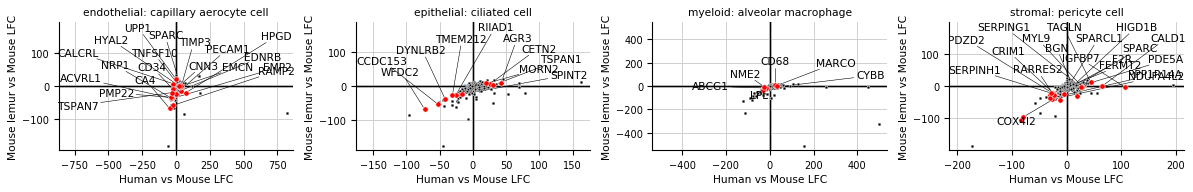

In [59]:
def add_gene_names(
    x,
    y,
    *args,
    significance_multiplier=3,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
    constitutive_genes=constitutive_genes_for_plotting,
    **kwargs,
):
    threshold = logfoldchange_threshold * significance_multiplier
    x_mask = x.abs() > (logfoldchange_threshold * significance_multiplier)
    y_mask = y.abs() > (logfoldchange_threshold * significance_multiplier)
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]

    texts = []
    xs_plotted = []
    ys_plotted = []
    for x0, y0, gene_name in zip(x, y, x.index):
        not_ribosomal = not gene_name.startswith("RP")
        not_constitutive = not gene_name in constitutive_genes
        is_interesting = not_ribosomal & not_constitutive
        if (abs(x0) > threshold or abs(y0) > threshold) and is_interesting:
#             text = plt.annotate(
#                 gene_name,
#                 xy=(x0, y0),
#                 arrowprops=arrowprops,
#                 xytext=(np.sign(x0) * 10, np.sign(y0) * 10),
#                 textcoords='offset points',
#             )
            xs_plotted.append(x0)
            ys_plotted.append(y0)
            #         else:
            text = plt.text(x0, y0, gene_name, zorder=100)
            texts.append(text)

    sns.scatterplot(x=xs_plotted, y=ys_plotted, linewidth=0.5, color="red", zorder=10)

    # Get the points already plotted to avoid
    ax = plt.gca()

    # Make axis a little bigger for all the text
#     xmin, xmax, ymin, ymax = ax.axis()
#     multiplier = 1.5
#     ax.set(
#         xlim=(multiplier * xmin, multiplier * xmax),
#         ylim=(multiplier * ymin, multiplier * ymax),
#     )

    scatter = ax.collections
    adjust_text(
        texts,
        np.asarray(xs_plotted),
        np.asarray(ys_plotted),
        add_objects=scatter,
#         adata=False,
        #         Increase allowed overlaps
#         precision=1,
        #         # Increase number of iterations
#         lim=5000,
        # Add arrow
        save_steps=True,
        arrowprops=arrowprops,
#         adata=False,
    )
    ax.axhline(color="k", zorder=-1)
    ax.axvline(color="k", zorder=-1)

g = sns.FacetGrid(
    data=diffexpr_aggregated_pct_expr_filtered_celltype_subset,
    col="group",
    aspect=1.5,
#     col_wrap=2,
    sharex=False,
    sharey=False,
    height=2.5,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse lemur"),
    rasterized=True,
    alpha=0.5,
    color='steelblue',
    marker='.',
    zorder=1,
)

g.map(
    scatterplot_constitutive,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse lemur"),
    rasterized=True,
    constitutive_genes=constitutive_genes_for_plotting,
    alpha=0.5,
    color='black',
    zorder=5,
    marker='.'
)
for ax in g.axes.flat:
    # Make axis line centered
    xmin, xmax, ymin, ymax = ax.axis()
    new_xmax = max(xmax, -xmin)
    new_ymax = max(ymax, -ymin)
    ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

    ax.axhline(color="k")
    ax.axvline(color="k")
g.map(add_gene_names, ("logfoldchange", "Human"), ("logfoldchange", "Mouse lemur"), logfoldchange_threshold=20, significance_multiplier=1)


# Label the plot
g.set_titles("{col_name}")
g.set(xlabel="Human vs Mouse LFC", ylabel="Mouse lemur vs Mouse LFC")
g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__select_celltypes.pdf"),
    dpi=300,
)

> Comparison of cell types revealed lemurs possess lungs cell types found in human, but not mouse, such as the recently described fibromyocytes that express genes from both myofibroblasts (ASPN, FGF18, and COL1A2) [and also smooth muscle cells (ACTA2, CNN1, TAGLN) and that localize to airways in human]. Comparison of global expression patterns across 23 lung cell types shared across all three datasets, and spanning each major tissue compartment, revealed that 11 lemur cell types were more significantly similar to human than mouse (such as plasma cells, multiple dendritic populations, and both types of lung capillaries), 8 were equally similar (such as adventitial and alveolar fibroblasts and monocytes), and 4 were more similar to mouse than human (such as lymphatics and CD8+ T cells). Together, these results suggest lemur lungs are more similar to human and provide a roadmap for which cell types and physiological processes require primate models for future study, and those that do not.

> Analyzing the specific genes with shared expression in lemur and human cells, but not in mice, that helped drive the global similarity scores revealed they could influence each cell type’s canonical molecular function. This includes alveolar macrophage’s role in immune modulation through primate-specific expression of complement genes (C1QA,C1QB, CFD) and genes responsive to pathogens or injury (OSCAR, IL4I1, MME), ciliated cells role in airway clearance through expression of modulators of ciliary formation and function (SPATA4, CIB1, WDR38, WDR54), capillary aerocyte function in gas-exchange through expression of an enzyme which synthesizes (ACE) and receptor which responds to (VIPR1) vasoactive hormones, and pericytes in maintaining capillary integrity through expression of modulators of angiogenesis (NDRG1, RGS5) and wound healing (WFDC1). Notably, these four examples also come from cells across the four major lung tissue compartments and provide specific molecular targets for future functional studies.


In [60]:
adata

AnnData object with n_obs × n_vars = 83526 × 12972
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'narrow_group_dendrogram', 'narrow_group_dendrogram_colors', 'narrow_group_dendrogram_color', 'asdf', 'asdf_colors', 'dendrogram_group', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'dendrogram_group_name_colors', 'dendrogram_subgroup_name_colors'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapi

In [61]:
# diffexpr_aggregated.loc[(diffexpr_aggregated.logfoldchange > 100).any(axis=1)]

In [62]:
diffexpr_aggregated.logfoldchange == 0

species,Human,Mouse lemur
gene_name,,
A1BG,False,True
A1CF,True,True
A2M,False,True
A3GALT2,True,True
A4GALT,False,False
...,...,...
ZWINT,False,False
ZYG11A,True,True
ZYG11B,False,False


In [63]:
diffexpr_aggregated.shape

(285384, 13)

## Get genes changing in both human-mouse and lemur-mouse comparisons, find primate gain and loss

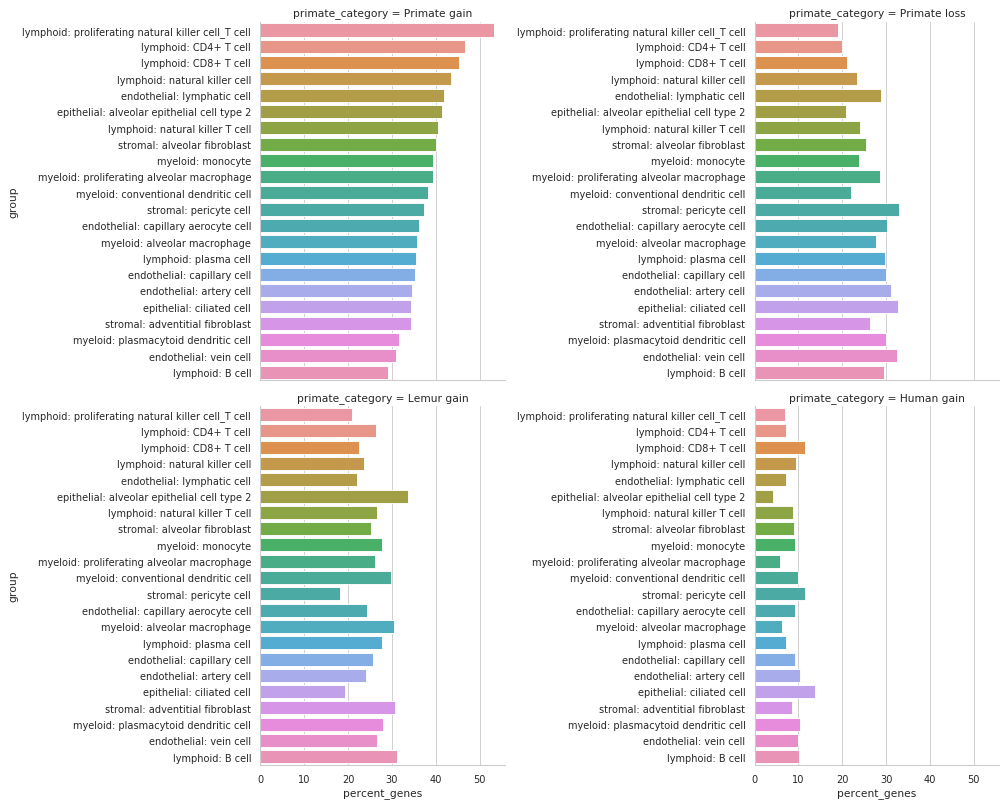

In [64]:
diffexpr_aggregated_changing = diffexpr_aggregated.loc[(diffexpr_aggregated.logfoldchange != 0).all(axis=1)].dropna()
diffexpr_aggregated_changing.shape

str_to_quadrant = {
    "True-True": "Primate gain",
    "False-False": "Primate loss",
    "True-False": "Human gain",
    "False-True": "Lemur gain",
}

diffexpr_aggregated_changing["primate_category"] = (
    (diffexpr_aggregated_changing.logfoldchange > 0)
    .apply(lambda x: "-".join(map(str, x)), axis=1)
    .map(str_to_quadrant)
)
diffexpr_aggregated_changing.head()

sns.set(context='paper', style='whitegrid')

diffexpr_aggregated_changing.group.value_counts()

diffexpr_aggregated_changing_primate_categories = diffexpr_aggregated_changing.groupby(['group']).primate_category.value_counts()
diffexpr_aggregated_changing_primate_categories.head()

diffexpr_aggregated_changing_primate_categories_percent = (
    diffexpr_aggregated_changing_primate_categories.groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    )
)
diffexpr_aggregated_changing_primate_categories_percent.name = 'percent_genes'
diffexpr_aggregated_changing_primate_categories_percent = diffexpr_aggregated_changing_primate_categories_percent.reset_index()

diffexpr_aggregated_changing_primate_categories_percent.head()

primate_gain = diffexpr_aggregated_changing_primate_categories_percent.query('primate_category == "Primate gain"')
primate_gain =  primate_gain.sort_values('percent_genes', ascending=False)
primate_gain

primate_loss = diffexpr_aggregated_changing_primate_categories_percent.query('primate_category == "Primate loss"')
primate_loss =  primate_loss.sort_values('percent_genes', ascending=False)
primate_loss

# g = sns.catplot(
#     data=diffexpr_aggregated_changing_primate_categories_percent,
#     hue="primate_category",
#     y="group",
#     x='percent_genes',
#     kind='bar',
#     order=primate_gain.group,
#     height=5,
#     aspect=1.25,
# )
# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
# )

g = sns.catplot(
    data=diffexpr_aggregated_changing_primate_categories_percent,
    col="primate_category",
    y="group",
    x='percent_genes',
    kind='bar',
    order=primate_gain.group,
    height=5,
    aspect=1.25,
    sharey=False,
    col_wrap=2
)
g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
)

### Show where genes match up the most

In [65]:
mask1 = diffexpr_aggregated['group'] == "lymphoid: B cell"
mask2 = diffexpr_aggregated.logfoldchange > 20

diffexpr_aggregated.loc[mask1 & mask2]

ValueError: cannot reindex from a duplicate axis

# Make dotplots

In [ ]:
figure_folder_base

In [ ]:
save_folder = os.path.join(figure_folder_base, 'dotplots')
! mkdir -p $save_folder
sc.settings.figdir = save_folder

### Primate loss of expression dotplots

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=False,
    save=True,
    save_format='pdf' 
    
)

### Primate gain of expression dotplots

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=True,
    save=True,
    save_format='pdf' 
    
)

In [ ]:
# cross_species.de_dotplots_multispecies(save=True, ignore_genes=dissociation_genes)

## Matplotlibrc

In [ ]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

## Dotplolts

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species-lung/across-species-within-group-diffexpr/ligand_groups'
# ! rm -rf $outdir_gdrive
! mkdir $outdir_gdrive

sc.set_figure_params(
    dpi=200, dpi_save=300, transparent=True, vector_friendly=True, frameon=False
)


for ligand, index in ligand_groups_primate.items():
    print(f'--- {ligand} ---')

    ligands_of_receptors = receptor_ligand_pairs_primate.loc[index]
    
    receptor_subset = sorted(list(ligands_of_receptors[receptor_col].unique()))
    ligand_subset = sorted(list(ligands_of_receptors[ligand_col].unique()))
    gene_subset = ligand_subset + receptor_subset
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
    
    save_dir = f'{outdir_gdrive}/ligand-centric/{ligand}/'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=ligand)


# Look at disease gene expression

## Initialize disease lookup

In [ ]:
from biothings_client import get_client

md = get_client("disease")
md

## Get curated lung diseases from Human Lung Cell Atlas

In [ ]:
hlca_curated_lung_diseases = pd.read_csv('https://raw.githubusercontent.com/krasnowlab/HLCA/master/Analysis/dbs/currated-lung-diseases.tsv', sep='\t')
print(hlca_curated_lung_diseases.shape)
hlca_curated_lung_diseases.head()

In [ ]:
hlca_curated_lung_diseases['to_query'] = hlca_curated_lung_diseases['Title'].apply(lambda x: x.lower().split(';')[0].split(',')[0].split('/')[0])

# Hand-fix some queries
replacer = {
    '46': 'XX SEX REVERSAL WITH DYSGENESIS OF KIDNEYS, ADRENALS, AND LUNGS'.lower()
}
hlca_curated_lung_diseases['to_query'] = hlca_curated_lung_diseases['to_query'].replace(replacer)
hlca_curated_lung_diseases['omim_id'] = hlca_curated_lung_diseases['MIM Number'].str.strip('#%')
hlca_curated_lung_diseases.head()

In [ ]:
hlca_curated_lung_diseases.loc[hlca_curated_lung_diseases.Title.str.contains("46")]

In [ ]:
hlca_curated_lung_diseases.loc[hlca_curated_lung_diseases.Title.str.contains("PULMONARY DISEASE")]

In [ ]:
(hlca_curated_lung_diseases.to_query == "syndrome").sum()

### for some reason query many doesn't work?

In [ ]:
hlca_curated_lung_diseases_mydisease_queries = hlca_curated_lung_diseases['to_query'].map(md.query)
len(hlca_curated_lung_diseases_mydisease_queries)

In [ ]:
mydisease_results = md.querymany(hlca_curated_lung_diseases['to_query'].values, scopes='all')
len(mydisease_results)
# print(mydisease_results.shape)
# mydisease_results.head()

In [ ]:
# md.query('surfactant metabolism dysfunction')

In [ ]:
# type(mydisease_results['dup'])

In [ ]:
# mydisease_results.keys()

In [ ]:
# type(mydisease_results['out'])

## Parse individual queries

In [ ]:
def _does_hit_have_genes_and_omim(hit, omim_ids):
    if 'mondo' in hit and 'disgenet' in hit:
        xrefs = hit['mondo']['xrefs']
        # Check for both 
        if 'omim' in xrefs and xrefs['omim'] in omim_ids:
            return True
    return False


def _print_hit(hit):
    print('---')
    print(hit['mondo']['label'])
    print(len(hit), hit['_id'])
    print(hit.keys())


def mydisease_results_parse(mydisease_results, omim_ids, verbose=False):
    """Run a query for mydisease.info and parse the results
    
    Get terms that have genes associated with the disease (disgenet) and a disease ontology (mondo)
    """
    filtered_results = []
    for result in mydisease_results:            
        for hit in result['hits']:
            if verbose:
                _print_hit(hit)

            if _does_hit_have_genes_and_omim(hit, omim_ids):
                filtered_results.append(hit)
    return filtered_results




def convert_mydisease_results_to_dictionary(mydisease_results):
    disease_genes = {}

    for disease in mydisease_results:
        disease_name = disease['mondo']['label']
    #     print(disease_name)
        try:
            genes_related_to_disease = disease['disgenet']['genes_related_to_disease']
            if isinstance(genes_related_to_disease, list):
                gene_symbols = [x['gene_name'] for x in genes_related_to_disease]
            else:
                gene_symbols = [genes_related_to_disease['gene_name']]
            disease_genes[disease_name] = gene_symbols
        except KeyError:
            continue
    for k, v in disease_genes.items():
        print(f"{k}: {len(v)}")
    return disease_genes


hlca_curated_lung_diseases_mydisease_queries_filtered = mydisease_results_parse(hlca_curated_lung_diseases_mydisease_queries, hlca_curated_lung_diseases['omim_id'].values)
lung_related_diseases_genes = convert_mydisease_results_to_dictionary(hlca_curated_lung_diseases_mydisease_queries_filtered)


In [ ]:
import json

with open('lung_related_disease_genes.json', 'w') as f:
    json.dump(lung_related_diseases_genes, f)

In [ ]:
# hlca_curated_mydisease_results = list(itertools.chain(*hlca_curated_lung_diseases['to_query'].map(
#     lambda x: mydisease_query_parse(x, omim_ids = hlca_curated_lung_diseases['omim_id']))))
# len(hlca_curated_mydisease_results)

In [ ]:

# hlca_curated_mydisease_results[0]['mondo']['xrefs']

In [ ]:
lung_related_diseases = []

In [ ]:
mydisease_results = md.query('copd')
for hit in mydisease_results['hits']:
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
# copd = mydisease_results['hits'][0]
# copd['ctd'].keys()

In [ ]:
# copd_ctd_chemical_genes = sorted([x['inference_gene_symbol'] for x in copd['ctd']['chemical_related_to_disease']])
# copd_ctd_pathway_genes = sorted([x['inference_gene_symbol'] for x in copd['ctd']['pathway_related_to_disease']])

In [ ]:
# 'HHIP' in copd_ctd_chemical_genes

In [ ]:
# 'HHIP' in copd_ctd_pathway_genes

In [ ]:
mydisease_results = md.query('lung')
for hit in mydisease_results['hits']:
    print('---')
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
#     for synonym in hit['mondo']['synonyms']:
#         print(f'\t{synonym}')
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
mydisease_results = md.query('asthma')
for hit in mydisease_results['hits']:
    print('---')
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
#     for synonym in hit['mondo']['synonyms']:
#         print(f'\t{synonym}')
        
    if 'ctd' in hit:
        print(f'ctd: {len(hit["ctd"])}')
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
mydisease_results = md.query('pulmonary')
for hit in mydisease_results['hits']:
    print('---')
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
#     for synonym in hit['mondo']['synonyms']:
#         print(f'\t{synonym}')
        
    if 'ctd' in hit:
        print(f'ctd: {len(hit["ctd"])}')
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
disease = lung_related_diseases[0]
disease.keys()

In [ ]:


def convert_mydisease_results_to_dictionary(mydisease_results):
    disease_genes = {}

    for disease in mydisease_results:
        disease_name = disease['mondo']['label']
    #     print(disease_name)
        try:
            genes_related_to_disease = disease['disgenet']['genes_related_to_disease']
            if isinstance(genes_related_to_disease, list):
                gene_symbols = [x['gene_name'] for x in genes_related_to_disease]
            else:
                gene_symbols = [genes_related_to_disease['gene_name']]
            disease_genes[disease_name] = gene_symbols
        except KeyError:
            continue
    for k, v in disease_genes.items():
        print(f"{k}: {len(v)}")
    return disease_genes

lung_related_diseases_genes = convert_mydisease_results_to_dictionary(hlca_curated_lung_diseases_mydisease_queries_filtered)

In [ ]:
md.getdisease('MONDO:0005275')

## Parse omim data

In [ ]:
! wget https://www.omim.org/static/omim/data/mim2gene.txt

In [ ]:
mim2gene = pd.read_csv(
    "mim2gene.txt",
    comment="#",
    names=["omim_id", "omim_type", "entrez_gene_id", "hgnc_symbol", "ensembl_id"],
    sep="\t",
)
print(mim2gene.shape)
mim2gene.head()

In [ ]:
lung_related_diseases_genes

# Make dotplots of lung disease genes

## Make adatas for each species

In [ ]:
cross_species.adata_shared_subset = cross_species.subset_adata_shared_groups()
# cross_species.mini_adatas = cross_species.make_mini_adatas_per_group()


# cross_species.dotplots()

cross_species.species_adatas = cross_species.make_mini_adatas(cross_species.species_col, subgroup_col=cross_species.groups_col)

In [ ]:
adata_min_cells.obs['compartment_narrow_species'] = adata_min_cells.obs['compartment_narrow'].astype(str) + ' (' + adata_min_cells.obs['species_batch'].astype(str) + ')'
adata_min_cells.obs['compartment_narrow_species'].value_counts()

## Test dotplots with one gene subset

In [ ]:
# fig, axes = plt.subplots(ncols=3, figsize=(8, 3))


gene_subset = sorted(adata_min_cells.var.index.intersection(lung_related_diseases_genes['chronic obstructive pulmonary disease']))
len(gene_subset)

gene_subset = sorted(adata_min_cells.var.index.intersection(lung_related_diseases_genes['chronic obstructive pulmonary disease']))
species_to_color_map = {'Mouse': 'Blues', 'Mouse lemur': "YlOrBr", "Human": "Greens"}

for (species, ad), ax in zip(cross_species.species_adatas.items(), axes):
    print(species)
    color_map = species_to_color_map[species]
    sc.pl.dotplot(ad, gene_subset, groupby='compartment_narrow', standard_scale='var', log=True, color_map=color_map)
#     ax.set(title=species)

## Make dotplots, 50 genes at a time

In [ ]:
# Cribbed from https://docs.python.org/3/library/itertools.html#itertools-recipes

def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)
list(grouper(gene_subset, 3))

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP

In [ ]:
max_genes = 55

for disease_name, disease_genes in sorted(lung_related_diseases_genes.items(), key=lambda x: x[0].lower()):
    print(f'\n--- {disease_name} ---')
    gene_subset = sorted(adata_min_cells.var.index.intersection(disease_genes))
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
  

    name_sanitized = disease_name.replace(' ', '_').lower().replace('/', '-slash-')
    save_dir = f'{outdir_gdrive}/lung-diseases/{name_sanitized}'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=name_sanitized)
#     # Return groups of up to 50 genes at a time
#     gene_subset_collated = grouper(gene_subset, max_genes)
#     for i, gene_subset_subset in enumerate(gene_subset_collated):
#         print(f'gene subset #{i+1}')
#         gene_subset_subset_no_none = [x for x in gene_subset_subset if x is not None]

#         for (species, ad), ax in zip(cross_species.species_adatas.items(), axes):
#             print(species)
#             color_map = species_to_color_map[species]
#             sc.pl.dotplot(ad, gene_subset_subset_no_none, groupby='compartment_narrow', 
#                           standard_scale='var', log=True, color_map=color_map, dot_min=0.1, dot_max=1)

In [ ]:
pl

In [ ]:
'figures/dotplot/ligand-receptor/adams-oliver_syndrome_1/'